In [1]:
# pip3 install pandas-datareader
import pandas_datareader.data as web

In [2]:
import pandas as pd # pip3 install pandas on terminal 
import numpy as np # pip3 install numpy 
import matplotlib.pyplot as plt # pip3 install matplotlib
plt.style.use('fivethirtyeight') # comment here

In [3]:
apple = web.DataReader('aapl'
                         , 'yahoo'
                         , start = '12/31/1989'
                        ).reset_index()
apple.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1990-01-02,0.334821,0.312500,0.314732,0.332589,183198400.0,0.265909
1,1990-01-03,0.339286,0.334821,0.339286,0.334821,207995200.0,0.267693
2,1990-01-04,0.345982,0.332589,0.341518,0.335938,221513600.0,0.268586
3,1990-01-05,0.341518,0.330357,0.337054,0.337054,123312000.0,0.269478
4,1990-01-08,0.339286,0.330357,0.334821,0.339286,101572800.0,0.271263


In [4]:
apple.shape

(7779, 7)

In [5]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779 entries, 0 to 7778
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7779 non-null   datetime64[ns]
 1   High       7779 non-null   float64       
 2   Low        7779 non-null   float64       
 3   Open       7779 non-null   float64       
 4   Close      7779 non-null   float64       
 5   Volume     7779 non-null   float64       
 6   Adj Close  7779 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 425.5 KB


In [7]:
micro = web.DataReader('msft'
                        , 'yahoo'
                        , start = '12/31/1989'
                       ).reset_index()
micro.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1990-01-02,0.616319,0.598090,0.605903,0.616319,53033600.0,0.393385
1,1990-01-03,0.626736,0.614583,0.621528,0.619792,113772800.0,0.395601
2,1990-01-04,0.638889,0.616319,0.619792,0.638021,125740800.0,0.407236
3,1990-01-05,0.638889,0.621528,0.635417,0.622396,69564800.0,0.397263
4,1990-01-08,0.631944,0.614583,0.621528,0.631944,58982400.0,0.403358


In [8]:
micro.shape

(7779, 7)

In [9]:
ibm = web.DataReader('ibm'
                        , 'yahoo'
                        , start = '12/31/1989'
                       ).reset_index()
ibm.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1990-01-02,24.53125,23.62500,23.68750,24.50000,7041600.0,12.057833
1,1990-01-03,24.87500,24.59375,24.68750,24.71875,9464000.0,12.165504
2,1990-01-04,25.09375,24.71875,24.75000,25.00000,9674800.0,12.303916
3,1990-01-05,25.40625,24.87500,24.96875,24.93750,7570000.0,12.273159
4,1990-01-08,25.21875,24.81250,24.81250,25.09375,4625200.0,12.350060


In [10]:
ibm.shape

(7779, 7)

In [11]:
intel = web.DataReader('intc'
                        , 'yahoo'
                        , start = '12/31/1989'
                       ).reset_index()
intel.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1990-01-02,1.125000,1.062500,1.078125,1.125000,63833600.0,0.693848
1,1990-01-03,1.132812,1.093750,1.125000,1.093750,69504000.0,0.674574
2,1990-01-04,1.125000,1.078125,1.101562,1.117188,58483200.0,0.689029
3,1990-01-05,1.125000,1.101562,1.117188,1.109375,37036800.0,0.684211
4,1990-01-08,1.132812,1.109375,1.117188,1.125000,43305600.0,0.693848


In [12]:
intel.shape

(7779, 7)

In [13]:
amd = web.DataReader('amd'
                        , 'yahoo'
                        , start = '12/31/1989'
                       ).reset_index()
amd.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1990-01-02,4.1250,3.8125,3.9375,4.1250,2544000.0,4.1250
1,1990-01-03,4.1250,3.9375,4.0625,4.0000,686800.0,4.0000
2,1990-01-04,4.0625,3.8750,4.0000,3.9375,944200.0,3.9375
3,1990-01-05,3.8125,3.6875,3.8125,3.8125,1511000.0,3.8125
4,1990-01-08,3.8125,3.7500,3.8125,3.8125,477000.0,3.8125


In [14]:
amd.shape

(7779, 7)

In [21]:
oracle = web.DataReader('orcl'
                        , 'yahoo'
                        , start = '12/31/1989'
                       ).reset_index()
oracle.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1990-01-02,0.598765,0.567901,0.577160,0.595679,35510400.0,0.511959
1,1990-01-03,0.601852,0.527778,0.595679,0.530864,179844000.0,0.456254
2,1990-01-04,0.546296,0.518519,0.530864,0.546296,125278000.0,0.469517
3,1990-01-05,0.546296,0.509259,0.546296,0.515432,51017200.0,0.442991
4,1990-01-08,0.540123,0.503086,0.515432,0.533951,33161200.0,0.458907


In [22]:
oracle.shape

(7779, 7)

In [23]:
hp = web.DataReader('hp'
                        , 'yahoo'
                        , start = '12/31/1989'
                       ).reset_index()
hp.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1990-01-02,8.68750,8.56250,8.62500,8.62500,643200.0,3.317538
1,1990-01-03,8.56250,8.28125,8.56250,8.28125,318800.0,3.185317
2,1990-01-04,8.15625,8.03125,8.09375,8.06250,254000.0,3.101178
3,1990-01-05,8.12500,7.96875,8.00000,8.12500,185600.0,3.125219
4,1990-01-08,8.31250,8.03125,8.06250,8.31250,178400.0,3.197339


In [24]:
hp.shape

(7779, 7)

In [25]:
hp = hp[['Date', 'Open', 'Close', 'Volume']]
hp.head()

,Date,Open,Close,Volume
0,1990-01-02,8.62500,8.62500,643200.0
1,1990-01-03,8.56250,8.28125,318800.0
2,1990-01-04,8.09375,8.06250,254000.0
3,1990-01-05,8.00000,8.12500,185600.0
4,1990-01-08,8.06250,8.31250,178400.0


In [26]:
# create a new column 
hp['difference'] = hp.Close - hp.Open
hp.head()

,Date,Open,Close,Volume,difference
0,1990-01-02,8.62500,8.62500,643200.0,0.00000
1,1990-01-03,8.56250,8.28125,318800.0,-0.28125
2,1990-01-04,8.09375,8.06250,254000.0,-0.03125
3,1990-01-05,8.00000,8.12500,185600.0,0.12500
4,1990-01-08,8.06250,8.31250,178400.0,0.25000


In [28]:
# find cumulative sum of difference
hp['diff_cumsum'] = hp['difference'].cumsum()
hp.head()

,Date,Open,Close,Volume,difference,diff_cumsum
0,1990-01-02,8.62500,8.62500,643200.0,0.00000,0.00000
1,1990-01-03,8.56250,8.28125,318800.0,-0.28125,-0.28125
2,1990-01-04,8.09375,8.06250,254000.0,-0.03125,-0.31250
3,1990-01-05,8.00000,8.12500,185600.0,0.12500,-0.18750
4,1990-01-08,8.06250,8.31250,178400.0,0.25000,0.06250


In [29]:
hp['percent_change'] = (hp['Close'] - hp['Open']) / hp['Open'] * 100
hp.head()

,Date,Open,Close,Volume,difference,diff_cumsum,percent_change
0,1990-01-02,8.62500,8.62500,643200.0,0.00000,0.00000,0.000000
1,1990-01-03,8.56250,8.28125,318800.0,-0.28125,-0.28125,-3.284672
2,1990-01-04,8.09375,8.06250,254000.0,-0.03125,-0.31250,-0.386100
3,1990-01-05,8.00000,8.12500,185600.0,0.12500,-0.18750,1.562500
4,1990-01-08,8.06250,8.31250,178400.0,0.25000,0.06250,3.100775


In [31]:
hp.columns

Index(['Date', 'Open', 'Close', 'Volume', 'difference', 'diff_cumsum',
       'percent_change'],
      dtype='object')

In [32]:
hp = hp[['Date', 'Volume', 'diff_cumsum', 'Open', 'Close', 'difference', 'percent_change']]
hp.head()

,Date,Volume,diff_cumsum,Open,Close,difference,percent_change
0,1990-01-02,643200.0,0.00000,8.62500,8.62500,0.00000,0.000000
1,1990-01-03,318800.0,-0.28125,8.56250,8.28125,-0.28125,-3.284672
2,1990-01-04,254000.0,-0.31250,8.09375,8.06250,-0.03125,-0.386100
3,1990-01-05,185600.0,-0.18750,8.00000,8.12500,0.12500,1.562500
4,1990-01-08,178400.0,0.06250,8.06250,8.31250,0.25000,3.100775


In [33]:
# iloc finds the row based on index 
hp.iloc[0]

Date              1990-01-02 00:00:00
Volume                         643200
diff_cumsum                         0
Open                            8.625
Close                           8.625
difference                          0
percent_change                      0
Name: 0, dtype: object

In [34]:
hp.iloc[:10] # slicing rows

,Date,Volume,diff_cumsum,Open,Close,difference,percent_change
0,1990-01-02,643200.0,0.00000,8.62500,8.62500,0.00000,0.000000
1,1990-01-03,318800.0,-0.28125,8.56250,8.28125,-0.28125,-3.284672
2,1990-01-04,254000.0,-0.31250,8.09375,8.06250,-0.03125,-0.386100
3,1990-01-05,185600.0,-0.18750,8.00000,8.12500,0.12500,1.562500
4,1990-01-08,178400.0,0.06250,8.06250,8.31250,0.25000,3.100775
5,1990-01-09,240800.0,-0.12500,8.31250,8.12500,-0.18750,-2.255639
6,1990-01-10,73600.0,-0.09375,8.12500,8.15625,0.03125,0.384615
7,1990-01-11,169600.0,-0.03125,8.21875,8.28125,0.06250,0.760456
8,1990-01-12,89600.0,-0.25000,8.15625,7.93750,-0.21875,-2.681992
9,1990-01-15,219600.0,-0.06250,7.75000,7.93750,0.18750,2.419355


In [37]:
# loc to find specific locations, .loc[index, column]
hp.loc[0, 'Open']

8.625

In [40]:
hp.loc[hp.Date >= '2010-11-01',] # loc more useful for analytics

,Date,Volume,diff_cumsum,Open,Close,difference,percent_change
5252,2010-11-01,602400.0,-12.872585,43.150002,42.700001,-0.450001,-1.042875
5253,2010-11-02,1072500.0,-12.682587,42.590000,42.779999,0.189999,0.446111
5254,2010-11-03,975400.0,-12.842587,42.939999,42.779999,-0.160000,-0.372613
5255,2010-11-04,1094800.0,-12.122585,43.270000,43.990002,0.720001,1.663973
5256,2010-11-05,782400.0,-12.402584,43.980000,43.700001,-0.279999,-0.636650
...,...,...,...,...,...,...,...
7774,2020-11-06,1515700.0,-64.642347,15.550000,15.150000,-0.400001,-2.572351
7775,2020-11-09,3370100.0,-64.012346,16.900000,17.530001,0.630001,3.727817
7776,2020-11-10,2354600.0,-64.542347,17.930000,17.400000,-0.530001,-2.955944
7777,2020-11-11,1508300.0,-64.842346,17.580000,17.280001,-0.299999,-1.706480


In [42]:
hp.iloc[5252:] # more useful for modeling for train test split of dataframe 

,Date,Volume,diff_cumsum,Open,Close,difference,percent_change
5252,2010-11-01,602400.0,-12.872585,43.150002,42.700001,-0.450001,-1.042875
5253,2010-11-02,1072500.0,-12.682587,42.590000,42.779999,0.189999,0.446111
5254,2010-11-03,975400.0,-12.842587,42.939999,42.779999,-0.160000,-0.372613
5255,2010-11-04,1094800.0,-12.122585,43.270000,43.990002,0.720001,1.663973
5256,2010-11-05,782400.0,-12.402584,43.980000,43.700001,-0.279999,-0.636650
...,...,...,...,...,...,...,...
7774,2020-11-06,1515700.0,-64.642347,15.550000,15.150000,-0.400001,-2.572351
7775,2020-11-09,3370100.0,-64.012346,16.900000,17.530001,0.630001,3.727817
7776,2020-11-10,2354600.0,-64.542347,17.930000,17.400000,-0.530001,-2.955944
7777,2020-11-11,1508300.0,-64.842346,17.580000,17.280001,-0.299999,-1.706480


In [43]:
hp.loc[hp.percent_change > 1]

,Date,Volume,diff_cumsum,Open,Close,difference,percent_change
3,1990-01-05,185600.0,-0.187500,8.00000,8.125000,0.125000,1.562500
4,1990-01-08,178400.0,0.062500,8.06250,8.312500,0.250000,3.100775
9,1990-01-15,219600.0,-0.062500,7.75000,7.937500,0.187500,2.419355
11,1990-01-17,143200.0,-0.156250,7.75000,7.843750,0.093750,1.209677
12,1990-01-18,198800.0,0.093750,7.84375,8.093750,0.250000,3.187251
...,...,...,...,...,...,...,...
7768,2020-10-29,1555100.0,-65.192347,13.91000,14.300000,0.390000,2.803741
7769,2020-10-30,1643900.0,-64.602346,14.28000,14.870000,0.590000,4.131654
7770,2020-11-02,2030200.0,-64.002347,15.06000,15.660000,0.599999,3.984060
7775,2020-11-09,3370100.0,-64.012346,16.90000,17.530001,0.630001,3.727817


In [44]:
# find interday change of prices
hp.iloc[:2]

,Date,Volume,diff_cumsum,Open,Close,difference,percent_change
0,1990-01-02,643200.0,0.00000,8.6250,8.62500,0.00000,0.000000
1,1990-01-03,318800.0,-0.28125,8.5625,8.28125,-0.28125,-3.284672


In [45]:
hp['Close_Shift1_Down'] = hp.Close.shift(1)
hp.head()

,Date,Volume,diff_cumsum,Open,Close,difference,percent_change,Close_Shift1_Down
0,1990-01-02,643200.0,0.00000,8.62500,8.62500,0.00000,0.000000,NaN
1,1990-01-03,318800.0,-0.28125,8.56250,8.28125,-0.28125,-3.284672,8.62500
2,1990-01-04,254000.0,-0.31250,8.09375,8.06250,-0.03125,-0.386100,8.28125
3,1990-01-05,185600.0,-0.18750,8.00000,8.12500,0.12500,1.562500,8.06250
4,1990-01-08,178400.0,0.06250,8.06250,8.31250,0.25000,3.100775,8.12500


In [47]:
hp['interday'] = hp.Close_Shift1_Down - hp.Open
hp.head()

,Date,Volume,diff_cumsum,Open,Close,difference,percent_change,Close_Shift1_Down,interday
0,1990-01-02,643200.0,0.00000,8.62500,8.62500,0.00000,0.000000,NaN,NaN
1,1990-01-03,318800.0,-0.28125,8.56250,8.28125,-0.28125,-3.284672,8.62500,0.0625
2,1990-01-04,254000.0,-0.31250,8.09375,8.06250,-0.03125,-0.386100,8.28125,0.1875
3,1990-01-05,185600.0,-0.18750,8.00000,8.12500,0.12500,1.562500,8.06250,0.0625
4,1990-01-08,178400.0,0.06250,8.06250,8.31250,0.25000,3.100775,8.12500,0.0625


In [ ]:
# get rid of row index 0
# hp = hp[1:]

In [49]:
# find null values
hp.isna().sum()

Date                 0
Volume               0
diff_cumsum          0
Open                 0
Close                0
difference           0
percent_change       0
Close_Shift1_Down    1
interday             1
dtype: int64

In [50]:
# fill null values with .fillna(0)
hp = hp.fillna(0)

In [51]:
hp.isna().sum()

Date                 0
Volume               0
diff_cumsum          0
Open                 0
Close                0
difference           0
percent_change       0
Close_Shift1_Down    0
interday             0
dtype: int64

In [52]:
hp.head()

,Date,Volume,diff_cumsum,Open,Close,difference,percent_change,Close_Shift1_Down,interday
0,1990-01-02,643200.0,0.00000,8.62500,8.62500,0.00000,0.000000,0.00000,0.0000
1,1990-01-03,318800.0,-0.28125,8.56250,8.28125,-0.28125,-3.284672,8.62500,0.0625
2,1990-01-04,254000.0,-0.31250,8.09375,8.06250,-0.03125,-0.386100,8.28125,0.1875
3,1990-01-05,185600.0,-0.18750,8.00000,8.12500,0.12500,1.562500,8.06250,0.0625
4,1990-01-08,178400.0,0.06250,8.06250,8.31250,0.25000,3.100775,8.12500,0.0625


In [53]:
# statistics overall numerical data 
hp.describe()

,Volume,diff_cumsum,Open,Close,difference,percent_change,Close_Shift1_Down,interday
count,7.779000e+03,7779.000000,7779.000000,7779.000000,7779.000000,7779.000000,7779.000000,7779.000000
mean,1.103656e+06,-7.807813,31.222057,31.213762,-0.008294,0.004569,31.211577,-0.009371
std,1.045081e+06,13.205119,24.601060,24.591330,0.827819,2.356561,24.593349,0.457260
min,1.120000e+04,-67.012350,4.562500,4.562500,-7.239998,-15.164907,0.000000,-3.549999
25%,4.096000e+05,-10.837456,11.375000,11.343750,-0.260002,-1.253918,11.343750,-0.119999
50%,9.156000e+05,-4.625000,20.320000,20.312500,0.000000,0.000000,20.312500,0.000000
75%,1.529150e+06,-1.312500,50.879999,50.965000,0.270000,1.246756,50.965000,0.063749
max,3.318140e+07,22.637543,118.610001,118.290001,6.300003,17.514370,118.290001,7.590000


In [54]:
# average of interday column
hp.interday.mean()

-0.009371043385599952

In [55]:
hp.interday.std()

0.4572598473724046

In [56]:
hp.interday.describe()

count    7779.000000
mean       -0.009371
std         0.457260
min        -3.549999
25%        -0.119999
50%         0.000000
75%         0.063749
max         7.590000
Name: interday, dtype: float64

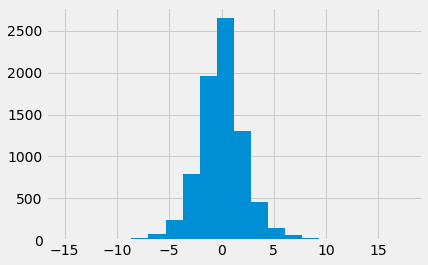

In [58]:
hp.percent_change.hist(bins = 20) # short way to graph histogram for pandas

In [59]:
# graph data prices vs time
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [60]:
hp.head(5)

,Date,Volume,diff_cumsum,Open,Close,difference,percent_change,Close_Shift1_Down,interday
0,1990-01-02,643200.0,0.00000,8.62500,8.62500,0.00000,0.000000,0.00000,0.0000
1,1990-01-03,318800.0,-0.28125,8.56250,8.28125,-0.28125,-3.284672,8.62500,0.0625
2,1990-01-04,254000.0,-0.31250,8.09375,8.06250,-0.03125,-0.386100,8.28125,0.1875
3,1990-01-05,185600.0,-0.18750,8.00000,8.12500,0.12500,1.562500,8.06250,0.0625
4,1990-01-08,178400.0,0.06250,8.06250,8.31250,0.25000,3.100775,8.12500,0.0625


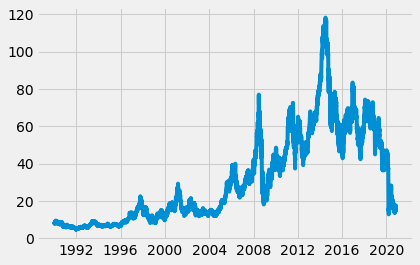

In [62]:
plt.plot(hp.Date # x values
         , hp.Close # y values
        );

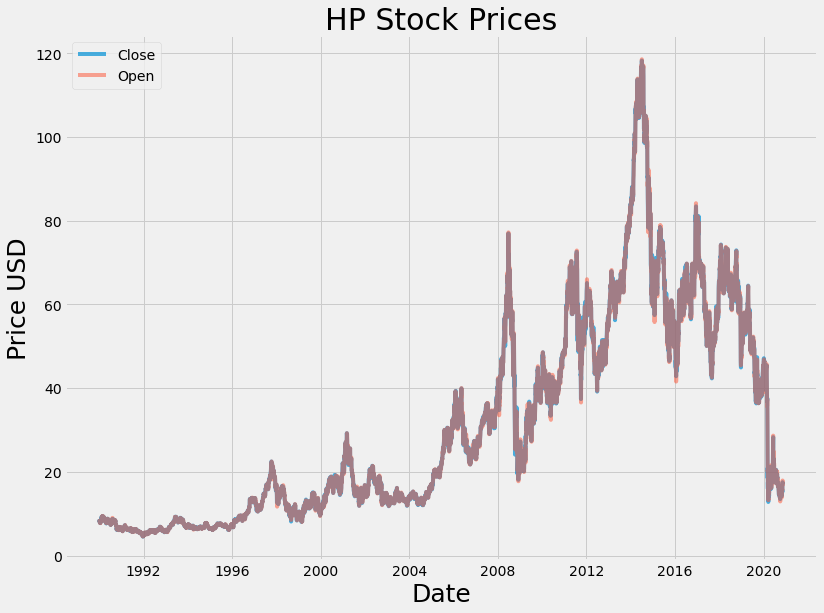

In [74]:
# customize title, labels and legends
plt.figure(figsize = (12,9))
plt.plot(hp.Date # x values
         , hp.Close # y1 values
         , label = 'Close'
         , alpha = 0.7
        )
plt.plot(hp.Date # x values
         , hp.Open # y2 values
         , label = 'Open'
         , alpha = 0.5
        )
plt.title('HP Stock Prices'
          , fontsize = 30
         )
plt.xlabel('Date'
           , fontsize = 25
          )
plt.ylabel('Price USD'
           , fontsize = 25
          )
plt.legend(loc = 'upper left');

In [4]:
apple = apple[['Date', 'Close']]
apple.head()

,Date,Close
0,2008-12-31,3.048214
1,2009-01-02,3.241071
2,2009-01-05,3.377857
3,2009-01-06,3.322143
4,2009-01-07,3.250357


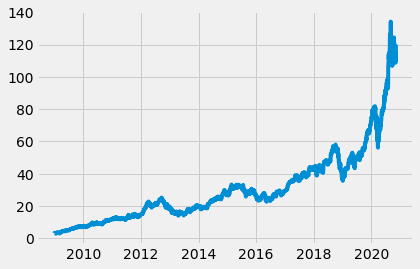

In [5]:
plt.plot(apple.Date
         , apple.Close
        );

In [6]:
apple['Previous_Close'] = apple.Close.shift(1)
apple.head()

,Date,Close,Previous_Close
0,2008-12-31,3.048214,NaN
1,2009-01-02,3.241071,3.048214
2,2009-01-05,3.377857,3.241071
3,2009-01-06,3.322143,3.377857
4,2009-01-07,3.250357,3.322143


In [7]:
apple = apple.iloc[1:]
apple.head()

,Date,Close,Previous_Close
1,2009-01-02,3.241071,3.048214
2,2009-01-05,3.377857,3.241071
3,2009-01-06,3.322143,3.377857
4,2009-01-07,3.250357,3.322143
5,2009-01-08,3.310714,3.250357


In [8]:
# Calculate Periodic Daily Return
apple['PDR'] = np.log(apple.Close / apple.Previous_Close)
apple.head()

,Date,Close,Previous_Close,PDR
1,2009-01-02,3.241071,3.048214,0.061348
2,2009-01-05,3.377857,3.241071,0.041338
3,2009-01-06,3.322143,3.377857,-0.016632
4,2009-01-07,3.250357,3.322143,-0.021845
5,2009-01-08,3.310714,3.250357,0.018399


In [9]:
# Test np.log is ln(x)
np.log(np.exp(1))

1.0

In [10]:
# Calculate Drift 
Drift = apple.PDR.mean() - apple.PDR.var() / 2
# Drift = 0 # can use zero in this instance
Drift

0.0010618644567390834

In [11]:
# Import random
import random
# Test list of 10 random numbers
[random.random() for _ in range(10)]

[0.8907536372012081,
 0.4742617991094391,
 0.7491325805893717,
 0.8547548593809161,
 0.6493988680204672,
 0.2119203283980331,
 0.11828589758354568,
 0.04978327910198388,
 0.43205056244895534,
 0.06874239128210147]

In [12]:
# Make Monte Carlo Predictions
from scipy import stats
sigma = apple.PDR.std()
apple.MC_Pred = 0
apple.loc[1, 'MC_Pred'] = apple.loc[1, 'Close'] * np.exp(Drift + sigma * stats.norm.ppf(random.random(), 0, 1))
for i in range(2, len(apple)+1):
    apple.loc[i, 'MC_Pred'] = apple.loc[i-1, 'MC_Pred'] * np.exp(Drift + sigma * stats.norm.ppf(random.random(), 0, 1))
apple.head()

,Date,Close,Previous_Close,PDR,MC_Pred
1,2009-01-02,3.241071,3.048214,0.061348,3.299593
2,2009-01-05,3.377857,3.241071,0.041338,3.425121
3,2009-01-06,3.322143,3.377857,-0.016632,3.366423
4,2009-01-07,3.250357,3.322143,-0.021845,3.381173
5,2009-01-08,3.310714,3.250357,0.018399,3.437270


In [13]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2984 entries, 1 to 2984
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2984 non-null   datetime64[ns]
 1   Close           2984 non-null   float64       
 2   Previous_Close  2984 non-null   float64       
 3   PDR             2984 non-null   float64       
 4   MC_Pred         2984 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 116.7 KB


In [14]:
len(apple['MC_Pred'])

2984

In [15]:
apple.MC_Pred = apple['MC_Pred']

In [16]:
len(apple.MC_Pred)

2984

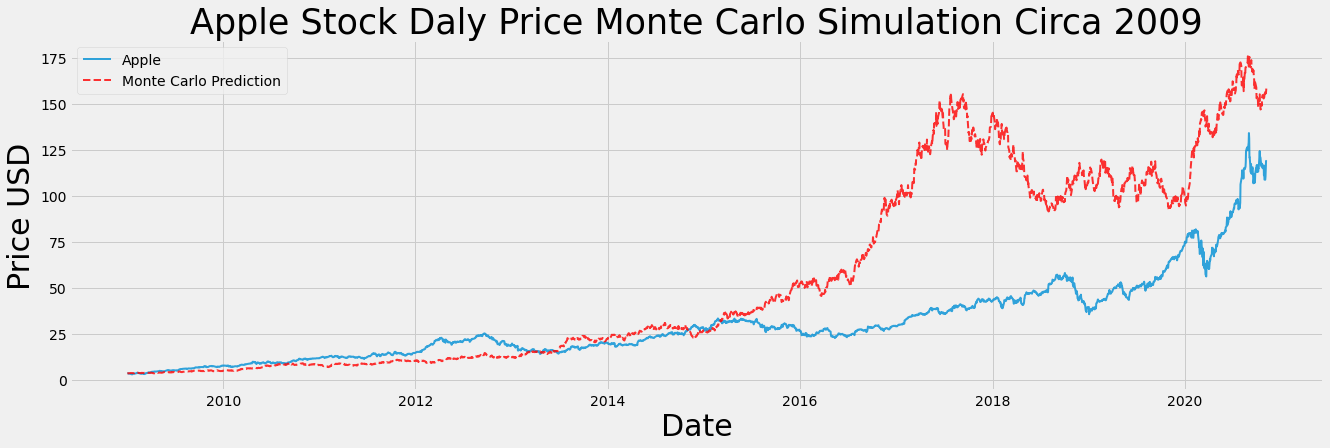

In [17]:
plt.figure(figsize = (20,6))
plt.plot(apple.Date
         , apple.Close
         , label = 'Apple'
         , alpha = 0.8
         , linewidth = 2
        )
plt.plot(apple.Date
         , apple.MC_Pred
         , 'r--'
         , label = 'Monte Carlo Prediction'
         , linewidth = 2
         , alpha = 0.8
        )
plt.legend()
plt.title('Apple Stock Daly Price Monte Carlo Simulation Circa 2009'
          , fontsize = 35
         )
plt.xlabel('Date'
           , fontsize = 30
          )
plt.ylabel('Price USD'
           , fontsize = 30
          );

In [18]:
# Make a function
def monte_stocks(ticker, date):
    pass